Dataset downloaded from https://www.kaggle.com/amananandrai/ag-news-classification-dataset

In [1]:
import os
import pandas as pd
import json
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Model
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df['Description'] = df['Description'].str.replace('(?:&)(.){1,4};', '', regex=True)
df['Description'] = df['Description'].str.replace('(?:#)(.){1,4};', '', regex=True)
df['Description'] = df['Description'].str.replace('b.../b', '', regex=True)
df['Description'] = df['Description'].str.replace(' s ', '', regex=True)
df['Description'] = df['Description'].str.replace('(?:quot;).*quot;', '', regex=True)

In [4]:
# df['Description'] = df['Description'].str.replace('british airways', 'britishairways', regex=False)
# df['Description'] = df['Description'].str.replace('new york city', 'newyorkcity', regex=False)
# df['Description'] = df['Description'].str.replace('new york', 'newyork', regex=False)

The dataframe has two text columns. We could concatenate them together as a single entry, but common sense tells us they are qualitatively different fields that have their own separate word distributions. Let's build a concetenation model to treat both fields as separate features.

In [5]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
text = ' '.join(df['Description']).lower()
split_it = text.split()
counts = Counter(split_it)
counts = counts.most_common(20)

In [7]:
counts

[('the', 196092),
 ('a', 104041),
 ('to', 94737),
 ('of', 88345),
 ('in', 77494),
 ('and', 65160),
 ('on', 46737),
 ('-', 38008),
 ('for', 37548),
 ('that', 26778),
 ('with', 22438),
 ('as', 21604),
 ('its', 21029),
 ('at', 20610),
 ('is', 19542),
 ('by', 18520),
 ('has', 18129),
 ('new', 16744),
 ('it', 16514),
 ('said', 16380)]

In [8]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [9]:
STOPWORDS.add('u')
STOPWORDS.add('said')

In [10]:
wordcloud = WordCloud(
    width= 3000, 
    height = 2000, 
    max_words = 400, 
    colormap='Pastel1', 
    stopwords = STOPWORDS).generate(text)

(-0.5, 2999.5, 1999.5, -0.5)

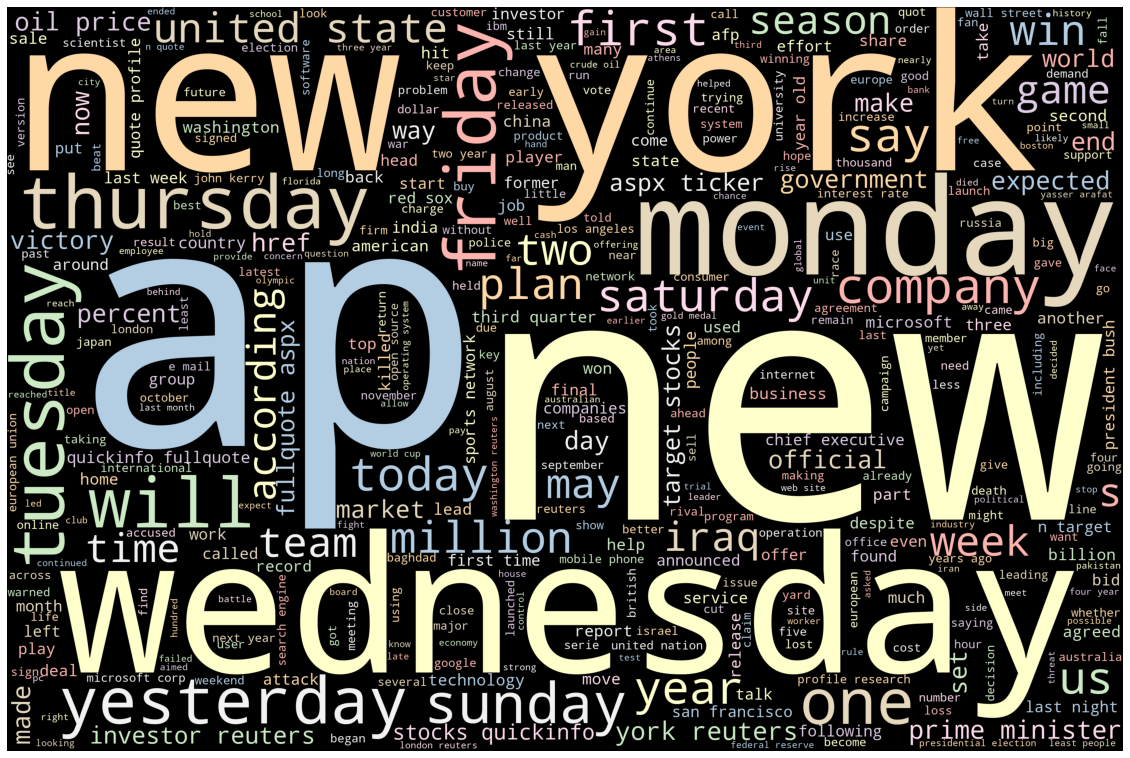

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud) 
plt.axis("off")

In [12]:
df['Class Index'].value_counts()
#ext = ' '.join(df['Description']).lower()


1    30000
2    30000
3    30000
4    30000
Name: Class Index, dtype: int64

In [13]:
world = df[df['Class Index'] == 1]
sports = df[df['Class Index'] == 2]
business = df[df['Class Index'] == 3]
sci = df[df['Class Index'] == 4]

(-0.5, 2999.5, 1999.5, -0.5)

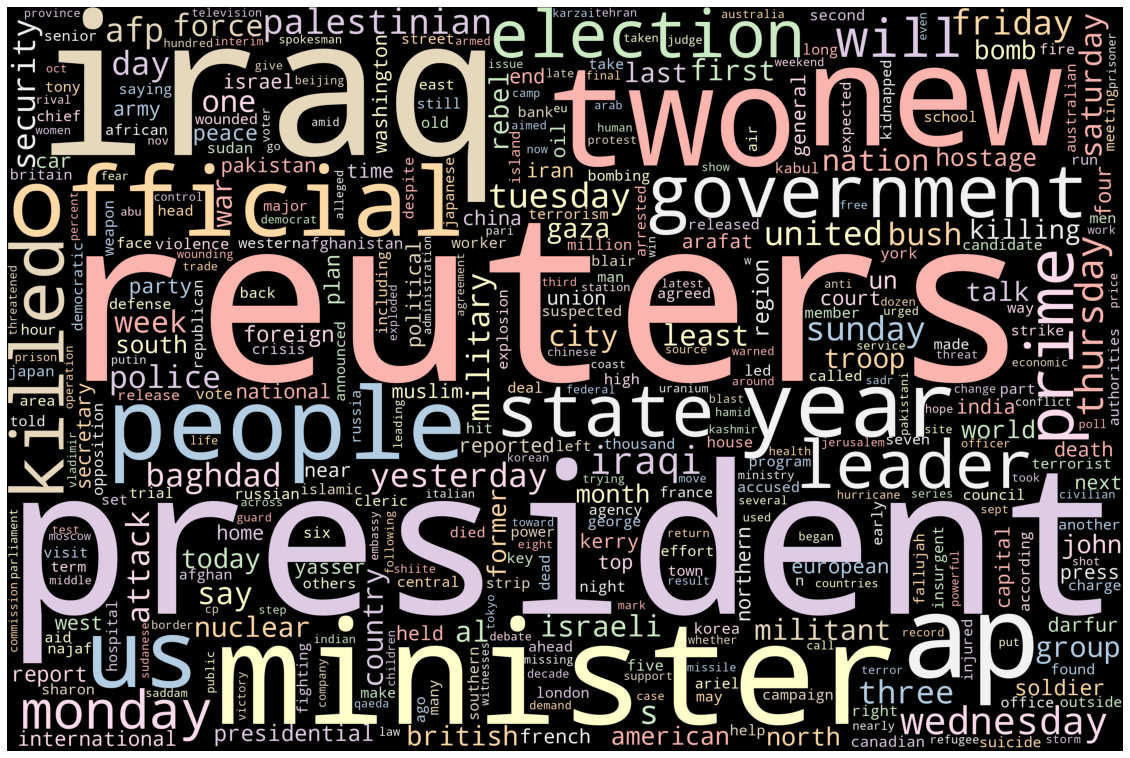

In [14]:
text = ' '.join(world['Description']).lower()

wordcloud = WordCloud(
    width= 3000, 
    height = 2000, 
    random_state=1, 
    max_words = 400, 
    colormap='Pastel1', 
    collocations=False, 
    stopwords = STOPWORDS).generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud) 
plt.axis("off")

In [16]:
world_lengths = world['Description'].apply(lambda x: len(x))
sports_lengths = sports['Description'].apply(lambda x: len(x))
business_lengths = business['Description'].apply(lambda x: len(x))
sci_lengths = sci['Description'].apply(lambda x: len(x))

Populating the interactive namespace from numpy and matplotlib


/Users/jeremy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'sci']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


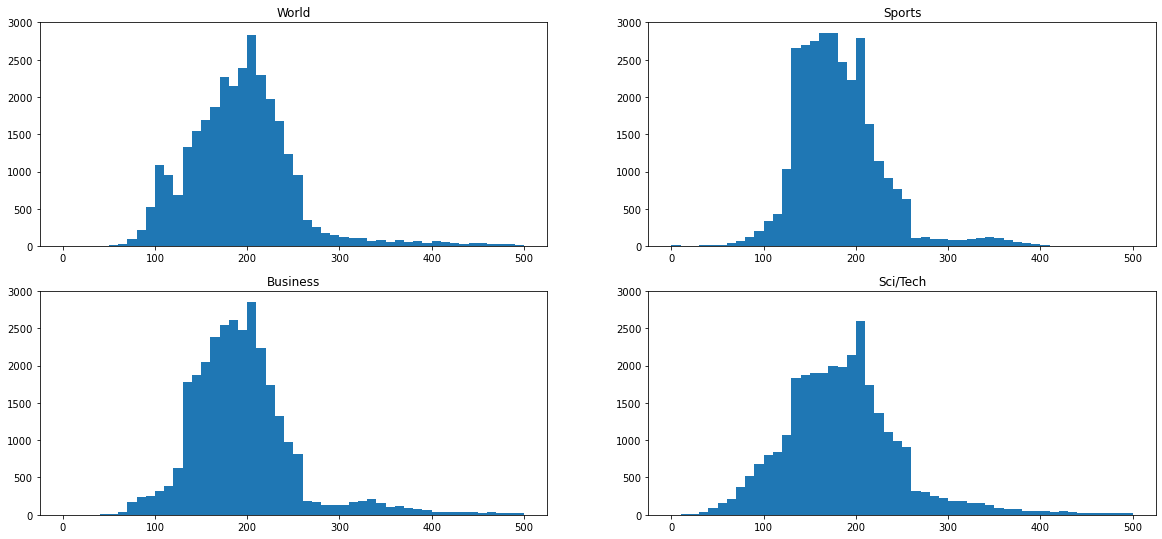

In [17]:
from matplotlib import pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 14)

dfs = [world_lengths, sports_lengths, business_lengths, sci_lengths]
titles = ['World', 'Sports', 'Business', 'Sci/Tech']

plot_num = 1

for i in range(len(dfs)):
    fig = plt.subplot(3,2,plot_num)

    axes = plt.gca()
    axes.set_ylim([0,3000])
    one_cat = dfs[i]
    plt.hist(one_cat, bins=50, range=(0,500))
    title = plt.gca().set_title(titles[i])
    plot_num += 1
    
plt.show()

In [18]:
print('Average world article length:', int(round(world_lengths.mean(), 0)))
print('Average sport article length:', int(round(sports_lengths.mean(), 0)))
print('Average business article length:', int(round(business_lengths.mean(), 0)))
print('Average sci/tech article length:', int(round(sci_lengths.mean(), 0)))

Average world article length: 193
Average sport article length: 181
Average business article length: 195
Average sci/tech article length: 190


We'll keep track of hyperparameters and other useful details related to this run in a text log. Let's define these values as constants here.

In [19]:
NOTES = ''
LEN = len(df)
SPLIT = 0.9
LAYERS = 2
DROPOUT = 0.5
BATCH = 100
EPOCHS = 5
SMOOTHING = 0.1
NODES_1 = 100
NODES_2 = 32
NODES_3 = 0

The singular feature for the left branch of the modelis stored in the variable X. The one-hot encoded output variable

In [20]:
log = pd.read_csv('text_and_title.csv')

X = df['Description']
Y = pd.get_dummies(df['Class Index'])

In [21]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=None)

encoder.adapt(X)

In [22]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), NODES_1, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(NODES_1,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(NODES_2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(DROPOUT),
    tf.keras.layers.Dense(Y.shape[1], activation='softmax')
])

In [23]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=SMOOTHING, from_logits=False),
            optimizer=tf.keras.optimizers.Adam(1e-4),
            metrics=([tf.keras.metrics.CategoricalCrossentropy(name='CatCrossentropy'), 
            tf.keras.metrics.CategoricalAccuracy(name='CatAccuracy'),
            tf.keras.metrics.Recall(name='Recall')]))

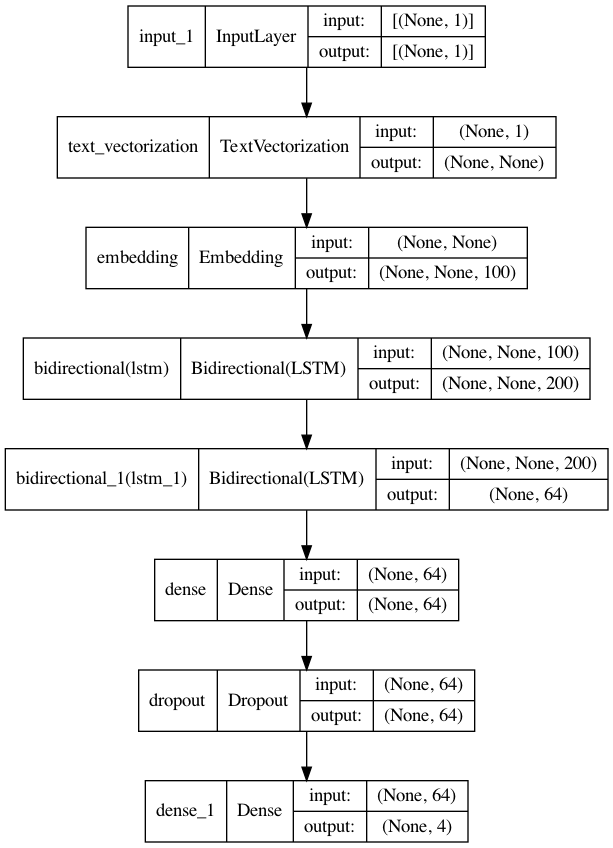

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 100)         10459100  
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [26]:
history = model.fit(x=X.values, y=Y.values, batch_size = BATCH, epochs=EPOCHS,
    validation_split=SPLIT, verbose=True)

Epoch 1/5
120/120 [==============================] - 142s 1s/step - loss: 1.3755 - CatCrossentropy: 1.3742 - CatAccuracy: 0.3684 - Recall: 0.0000e+00 - val_loss: 1.3334 - val_CatCrossentropy: 1.3270 - val_CatAccuracy: 0.4440 - val_Recall: 0.0000e+00
Epoch 2/5
120/120 [==============================] - 137s 1s/step - loss: 1.0841 - CatCrossentropy: 1.0145 - CatAccuracy: 0.5731 - Recall: 0.2658 - val_loss: 0.9702 - val_CatCrossentropy: 0.8787 - val_CatAccuracy: 0.6491 - val_Recall: 0.3820
Epoch 3/5
120/120 [==============================] - 135s 1s/step - loss: 0.8105 - CatCrossentropy: 0.6605 - CatAccuracy: 0.7879 - Recall: 0.6191 - val_loss: 0.8685 - val_CatCrossentropy: 0.7298 - val_CatAccuracy: 0.7192 - val_Recall: 0.6406
Epoch 4/5
120/120 [==============================] - 145s 1s/step - loss: 0.6695 - CatCrossentropy: 0.4720 - CatAccuracy: 0.8817 - Recall: 0.8097 - val_loss: 0.8231 - val_CatCrossentropy: 0.6606 - val_CatAccuracy: 0.7520 - val_Recall: 0.7047
Epoch 5/5
120/120 [=====

In [27]:
pred = model.predict(df['Description'])
pred = pd.Series(np.argmax(pred, axis=1))
pred += 1
df['pred'] = pred


ACC = len(df[df['pred']==df['Class Index']])/len(df)
print(ACC)

0.7635583333333333


In [39]:
world = df[df['Class Index']==1]
world_acc = len(world[world['pred']==1])/len(world)
sports = df[df['Class Index']==2]
sports_acc = len(sports[sports['pred']==2])/len(sports)
business = df[df['Class Index']==3]
business_acc = len(business[business['pred']==3])/len(business)
sci = df[df['Class Index']==4]
sci_acc = len(sci[sci['pred']==4])/len(sci)

print('Accuracy on world articles:', world_acc)
print('Accuracy on sports articles:', sports_acc)
print('Accuracy on business articles:', business_acc)
print('Accuracy on science/tech articles:', sci_acc)

Accuracy on world articles: 0.7735666666666666
Accuracy on sports articles: 0.7793
Accuracy on business articles: 0.7489
Accuracy on science/tech articles: 0.7524666666666666


In [28]:
row = {'accuracy': ACC, 'notes': NOTES, 'len': LEN,
    'split': SPLIT, 'layers': LAYERS, 'dropout': DROPOUT,
    'batch': BATCH, 'epochs': EPOCHS, 'smoothing': SMOOTHING,
    'nodes1': NODES_1, 'nodes2': NODES_2, 'nodes3': NODES_3}

print(row)

log = log.append(row, ignore_index=True)
log.to_csv('text_and_title.csv', index=False)

{'accuracy': 0.7635583333333333, 'notes': '', 'len': 120000, 'split': 0.9, 'layers': 2, 'dropout': 0.5, 'batch': 100, 'epochs': 5, 'smoothing': 0.1, 'nodes1': 100, 'nodes2': 32, 'nodes3': 0}


This model gets a max accuracy of .81, versus 0.78 for the description-only model. Not extraordinary, but it's not nothing!

In [59]:
labels = ['World', 'Sports', 'Business', 'Sci/Tech']

In [59]:
prediction = model.predict(np.array(['I just invented an app.']))
labels[argmax(prediction)]

'Sci/Tech'

In [60]:
prediction = model.predict(np.array(['I like to play with the ball.']))
labels[argmax(prediction)]

'Sports'

In [61]:
prediction = model.predict(np.array(['The prime minister is important.']))
labels[argmax(prediction)]

'World'

In [64]:
prediction = model.predict(np.array(['Inflation is happening.']))
labels[argmax(prediction)]

'Business'